In [1]:
import numpy as np
import pandas as pd 
dataset = pd.read_csv('my_movies.csv',sep=',')
dataset = dataset.replace(np.nan, '', regex=True)
dataset 

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,,,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,,,,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,,,,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,,,,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,,1,1,0,0,0,0,0,1,0,1


In [2]:
dataset
transactions = []
for i in range(0, 9):
    transactions.append([str(dataset.values[i,u]) for u in range(1,15)]) 

In [3]:
movies_series  = pd.DataFrame(pd.Series(transactions))
movies_series 
movies_series.columns = ["business"]
movies_series


,business
0,"[LOTR1, Harry Potter1, Green Mile, LOTR2, 1, 0..."
1,"[Patriot, Braveheart, , , 0, 1, 0, 0, 1, 0, 0,..."
2,"[LOTR2, , , , 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]"
3,"[Patriot, Sixth Sense, , , 1, 1, 0, 0, 1, 0, 0..."
4,"[Patriot, Sixth Sense, , , 1, 1, 0, 0, 1, 0, 0..."
5,"[Patriot, Sixth Sense, , , 1, 1, 0, 0, 1, 0, 0..."
6,"[Harry Potter2, , , , 0, 0, 0, 1, 0, 0, 1, 0, ..."
7,"[Patriot, , , , 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]"
8,"[Patriot, Sixth Sense, , , 1, 1, 0, 0, 1, 0, 0..."


In [4]:
df=pd.get_dummies(dataset)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_Patriot,V3_,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_,V4_Green Mile,V5_,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
1,0,1,0,0,1,0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0
2,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
4,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0


In [5]:
!pip install mlxtend

In [6]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets = apriori(df, min_support=0.005,max_len=3,use_colnames = True)
frequent_itemsets 

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
551,0.3,"(V3_, V4_, V5_)"
552,0.1,"(V3_Braveheart, V4_, V5_)"
553,0.1,"(V3_Gladiator, V4_Green Mile, V5_)"
554,0.1,"(V3_Harry Potter1, V4_Green Mile, V5_LOTR2)"


In [7]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
frequent_itemsets.sort_values 

<bound method DataFrame.sort_values of      support                                     itemsets
26       0.9                                        (V5_)
24       0.8                                        (V4_)
179      0.8                                   (V4_, V5_)
1        0.7                                  (Gladiator)
61       0.7                             (Gladiator, V5_)
..       ...                                          ...
240      0.1  (V1_Sixth Sense, V3_Gladiator, Sixth Sense)
239      0.1      (V1_Sixth Sense, V2_LOTR1, Sixth Sense)
238      0.1       (V1_Sixth Sense, V2_LOTR, Sixth Sense)
52       0.1                  (V1_Sixth Sense, Gladiator)
278      0.1          (V2_Patriot, Braveheart, Gladiator)

[556 rows x 2 columns]>

In [8]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False).head(10)  

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1211,"(V2_LOTR, V4_Green Mile)",(V3_Gladiator),0.1,0.1,0.1,1.0,10.0,0.09,inf
510,(V2_LOTR1),"(LOTR2, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
512,"(LOTR2, V4_Green Mile)",(V2_LOTR1),0.1,0.1,0.1,1.0,10.0,0.09,inf
1257,"(V1_Sixth Sense, V5_)",(V3_Gladiator),0.1,0.1,0.1,1.0,10.0,0.09,inf
517,(V2_LOTR1),"(LOTR2, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
518,"(LOTR2, V2_LOTR1)",(V3_Harry Potter1),0.1,0.1,0.1,1.0,10.0,0.09,inf
519,"(LOTR2, V3_Harry Potter1)",(V2_LOTR1),0.1,0.1,0.1,1.0,10.0,0.09,inf
522,(V2_LOTR1),"(LOTR2, V3_Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
523,(V3_Harry Potter1),"(LOTR2, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
524,"(V1_Sixth Sense, LOTR2)",(V5_LOTR2),0.1,0.1,0.1,1.0,10.0,0.09,inf


In [9]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(V4_),(V5_),0.8,0.9,0.8,1.000000,1.111111,0.08,inf
1,(V5_),(V4_),0.9,0.8,0.8,0.888889,1.111111,0.08,1.80
2,(Gladiator),(V5_),0.7,0.9,0.7,1.000000,1.111111,0.07,inf
3,(V5_),(Gladiator),0.9,0.7,0.7,0.777778,1.111111,0.07,1.35
4,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
...,...,...,...,...,...,...,...,...,...
2417,"(V2_Patriot, Gladiator)",(Braveheart),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
2418,"(Braveheart, Gladiator)",(V2_Patriot),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
2419,(V2_Patriot),"(Braveheart, Gladiator)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
2420,(Braveheart),"(V2_Patriot, Gladiator)",0.1,0.6,0.1,1.000000,1.666667,0.04,inf


In [10]:
ruletop20=rules[rules.lift>1].head(20)
ruletop20

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(V4_),(V5_),0.8,0.9,0.8,1.000000,1.111111,0.08,inf
1,(V5_),(V4_),0.9,0.8,0.8,0.888889,1.111111,0.08,1.80
2,(Gladiator),(V5_),0.7,0.9,0.7,1.000000,1.111111,0.07,inf
3,(V5_),(Gladiator),0.9,0.7,0.7,0.777778,1.111111,0.07,1.35
4,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
5,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
6,"(V2_Patriot, Gladiator)",(V4_),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
7,"(V2_Patriot, V4_)",(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,"(Gladiator, V4_)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(V2_Patriot),"(Gladiator, V4_)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [11]:
import matplotlib.pylab as plt

Text(0.5, 1.0, 'Antecedents VS LIft ratio')

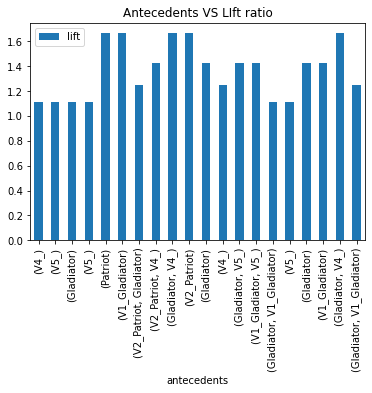

In [12]:
ruletop20.plot(x="antecedents",y ="lift",kind="bar") 
plt.title('Antecedents VS LIft ratio')